# In this notebook i will do some analysis and machine learning modelling to our dataset that contains the data of the employee in a company in Indonesia. Our main objective is to predict which employee that should be promoted based on his/her criteria.


# 1. Importing Library and Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib import rcParams
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets, linear_model, metrics
from sklearn.metrics import  confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
#from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, plot_confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
#from xgboost import XGBClassifier
#from lightgbm import LGBMClassifier

In [2]:
xls = pd.ExcelFile('Employee_data.xlsx')
df = pd.read_excel(xls, 'employee')
df_dict = pd.read_excel(xls, 'data_dictionary')

In [3]:
df.head()

id_karyawan         departemen     wilayah        pendidikan jenis_kelamin  \
0        80589  Sales & Marketing   wilayah_7  Master's & above             f   
1        80292         Operations  wilayah_22        Bachelor's             m   
2        22664  Sales & Marketing  wilayah_19        Bachelor's             m   
3        17693  Sales & Marketing  wilayah_23        Bachelor's             m   
4        64096         Technology  wilayah_26        Bachelor's             m   

  rekrutmen  jumlah_training  umur  rating_tahun_lalu  masa_kerja  KPI_>80%  \
0  sourcing                1    35                5.0           8         1   
1     other                1    30                5.0           4         0   
2  sourcing                1    34                3.0           7         0   
3     other                2    39                1.0          10         0   
4     other                1    45                3.0           2         0   

   penghargaan  rata_rata_skor_training  dipromosikan  
0            0                       49             0  
1            0                       60             0  
2            0                       50             0  
3            0                       50             0  
4            0                       73             0

In [4]:
df_dict

Unnamed: 0               Unnamed: 1  \
0          NaN                  atribut   
1          NaN                      NaN   
2          NaN              id_karyawan   
3          NaN               departemen   
4          NaN                  wilayah   
5          NaN               pendidikan   
6          NaN            jenis_kelamin   
7          NaN                rekrutmen   
8          NaN          jumlah_training   
9          NaN                     umur   
10         NaN        rating_tahun_lalu   
11         NaN               masa_kerja   
12         NaN                 KPI_>80%   
13         NaN              penghargaan   
14         NaN  rata_rata_skor_training   
15         NaN             dipromosikan   

                                           Unnamed: 2  
0                                           deskripsi  
1                                                 NaN  
2                                         id karyawan  
3   departemen tempat karyawan bekerja (contoh: Sa...  
4                             wilayah kerja karyawan   
5                        tingkat pendidikan karyawan   
6                             jenis kelamin karyawan   
7                                    jalur rekrutmen   
8   jumlah pelatihan yang diselesaikan oleh karyaw...  
9                                      umur karyawan   
10                        rating karyawan tahun lalu   
11                 masa bekerja karyawan dalam tahun   
12  key performance index apakah lebih besar dari ...  
13  jika memenangkan penghargaan sebagai karyawan ...  
14                           skor training rata-rata   
15                target (recommended for promotion)

In [5]:
df.shape

(54808, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id_karyawan              54808 non-null  int64  
 1   departemen               54808 non-null  object 
 2   wilayah                  54808 non-null  object 
 3   pendidikan               52399 non-null  object 
 4   jenis_kelamin            54808 non-null  object 
 5   rekrutmen                54808 non-null  object 
 6   jumlah_training          54808 non-null  int64  
 7   umur                     54808 non-null  int64  
 8   rating_tahun_lalu        50684 non-null  float64
 9   masa_kerja               54808 non-null  int64  
 10  KPI_>80%                 54808 non-null  int64  
 11  penghargaan              54808 non-null  int64  
 12  rata_rata_skor_training  54808 non-null  int64  
 13  dipromosikan             54808 non-null  int64  
dtypes: float64(1), int64(8

## Steps to be taken for Cleaning and EDA:

1. Clean missing values. Looking for imputation what to use, mean or what

2. Try to check the distribution of each continuous feature whether there are outliers or not

3. Try to check the continuous feature correlation and try to visualize if there is a linear correlation or use a scatter plot matrix

4. Questions for EDA:

   a. Does the amount of training, age, last year's routine, and years of service affect the key performance index or promotion?
  
   b. Do education and recruitment pathways affect employees being promoted?
  
   c. which departments are promoted the most?
   

# 2. Handling Missing Value

###### We check whether there is a missing value in the data

In [7]:
df.isnull().any()

id_karyawan                False
departemen                 False
wilayah                    False
pendidikan                  True
jenis_kelamin              False
rekrutmen                  False
jumlah_training            False
umur                       False
rating_tahun_lalu           True
masa_kerja                 False
KPI_>80%                   False
penghargaan                False
rata_rata_skor_training    False
dipromosikan               False
dtype: bool

###### There are two features that have missing values, namely education and rating_last_year, we will check one by one.

In [8]:
print('The number of missing value data in the "pendidikan" column :',df['pendidikan'].isnull().sum())
print('The percentage of number of missing value data in the "pendidikan" column :',(df['pendidikan'].isnull().sum())*100/df.shape[0],'%')


The number of missing value data in the "pendidikan" column : 2409
The percentage of number of missing value data in the "pendidikan" column : 4.395343745438622 %


In [9]:
print('The number of missing value data in the "rating_tahun_lalu" column :',df['rating_tahun_lalu'].isnull().sum())
print('The percentage of the number of missing value data in the "rating_tahun_lalu" column :',(df['rating_tahun_lalu'].isnull().sum())*100/df.shape[0],'%')


The number of missing value data in the "rating_tahun_lalu" column : 4124
The percentage of the number of missing value data in the "rating_tahun_lalu" column : 7.524448985549554 %


###### Because the missing value is relatively small (< 10%), we don't need to throw it away. We try to do imputation with the average value or mode of each column that has a missing value.

In [10]:
# Fill in the missing value in the education column with the value that appears the most, namely Bachelor's

df['pendidikan']=df['pendidikan'].fillna("Bachelor's")
df['pendidikan'].count()


54808

In [11]:
# fill in the missing value in the education column with the average value or mode

df['rating_tahun_lalu']=df['rating_tahun_lalu'].fillna(3.0)
df['rating_tahun_lalu'].count()


54808

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id_karyawan              54808 non-null  int64  
 1   departemen               54808 non-null  object 
 2   wilayah                  54808 non-null  object 
 3   pendidikan               54808 non-null  object 
 4   jenis_kelamin            54808 non-null  object 
 5   rekrutmen                54808 non-null  object 
 6   jumlah_training          54808 non-null  int64  
 7   umur                     54808 non-null  int64  
 8   rating_tahun_lalu        54808 non-null  float64
 9   masa_kerja               54808 non-null  int64  
 10  KPI_>80%                 54808 non-null  int64  
 11  penghargaan              54808 non-null  int64  
 12  rata_rata_skor_training  54808 non-null  int64  
 13  dipromosikan             54808 non-null  int64  
dtypes: float64(1), int64(8

#### Missing Value Problem is handled

# 3. Checking Outlier

###### We first check the statistic distribution of our features

In [13]:
df.describe()

id_karyawan  jumlah_training          umur  rating_tahun_lalu  \
count  54808.000000     54808.000000  54808.000000       54808.000000   
mean   54346.830627         1.253011     34.803915           3.304481   
std    22586.581449         0.609264      7.660169           1.214770   
min    15152.000000         1.000000     20.000000           1.000000   
25%    34820.750000         1.000000     29.000000           3.000000   
50%    54376.500000         1.000000     33.000000           3.000000   
75%    73881.500000         1.000000     39.000000           4.000000   
max    93449.000000        10.000000     60.000000           5.000000   

         masa_kerja      KPI_>80%   penghargaan  rata_rata_skor_training  \
count  54808.000000  54808.000000  54808.000000             54808.000000   
mean       5.865512      0.351974      0.023172                63.386750   
std        4.265094      0.477590      0.150450                13.371559   
min        1.000000      0.000000      0.000000                39.000000   
25%        3.000000      0.000000      0.000000                51.000000   
50%        5.000000      0.000000      0.000000                60.000000   
75%        7.000000      1.000000      0.000000                76.000000   
max       37.000000      1.000000      1.000000                99.000000   

       dipromosikan  
count  54808.000000  
mean       0.085170  
std        0.279137  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000

###### TIt can be seen that the jumlah_training or number of training column has a maximum value that is far from the average. This is a little suspicious and will be checked further. Second, the masa_kerja or working period column has a maximum value that is very far from the average and its 75% percentile, which is 37. It seems very rare for people to work for 37 years in the company. This will be checked further.

## 3.1. Outlier jumlah_training or number of training Feature

In [14]:
df[df['jumlah_training']==10]

id_karyawan         departemen     wilayah        pendidikan  \
6207         79691        Procurement   wilayah_2  Master's & above   
30936        59121        Procurement  wilayah_13        Bachelor's   
32870        15791        Procurement   wilayah_2        Bachelor's   
34496        64559        Procurement   wilayah_2        Bachelor's   
44897        27478  Sales & Marketing   wilayah_2  Master's & above   

      jenis_kelamin rekrutmen  jumlah_training  umur  rating_tahun_lalu  \
6207              m     other               10    55                3.0   
30936             m  sourcing               10    28                3.0   
32870             m  sourcing               10    36                1.0   
34496             m     other               10    60                3.0   
44897             f     other               10    42                3.0   

       masa_kerja  KPI_>80%  penghargaan  rata_rata_skor_training  \
6207           12         0            0                       70   
30936           2         0            0                       71   
32870          10         0            0                       66   
34496           3         0            0                       69   
44897          13         0            0                       49   

       dipromosikan  
6207              0  
30936             0  
32870             0  
34496             0  
44897             0

In [15]:
df['jumlah_training'].value_counts()

1     44378
2      7987
3      1776
4       468
5       128
6        44
7        12
8         5
10        5
9         5
Name: jumlah_training, dtype: int64

Looks like the value 10 in the training_number column still makes sense. It doesn't get thrown away. Then, the working period column will then be checked for possible outliers.

## 3.2. Outlier masa_kerja or working period Feature

In [16]:
df[df['masa_kerja']==37]

id_karyawan         departemen    wilayah  pendidikan jenis_kelamin  \
31071        66727  Sales & Marketing  wilayah_2  Bachelor's             m   

      rekrutmen  jumlah_training  umur  rating_tahun_lalu  masa_kerja  \
31071  sourcing                2    60                5.0          37   

       KPI_>80%  penghargaan  rata_rata_skor_training  dipromosikan  
31071         0            0                       48             0

We are checking it with IQR formula or method

In [17]:
Q12 = df['masa_kerja'].quantile(0.25)
Q32 = df['masa_kerja'].quantile(0.75)
IQR2 = Q32-Q12

In [18]:
df[df['masa_kerja']>(Q32+(1.5*IQR2))]

id_karyawan         departemen     wilayah        pendidikan  \
13           53552         Technology  wilayah_29  Master's & above   
42           38711                 HR   wilayah_2        Bachelor's   
60           32824  Sales & Marketing   wilayah_4  Master's & above   
74           92728  Sales & Marketing   wilayah_7        Bachelor's   
99           66407            Finance   wilayah_2  Master's & above   
...            ...                ...         ...               ...   
54691        19361          Analytics   wilayah_2  Master's & above   
54695        56499         Operations   wilayah_2        Bachelor's   
54697        25787  Sales & Marketing   wilayah_2        Bachelor's   
54754        60848         Technology  wilayah_26        Bachelor's   
54803        18181         Technology  wilayah_14        Bachelor's   

      jenis_kelamin rekrutmen  jumlah_training  umur  rating_tahun_lalu  \
13                m     other                2    39                3.0   
42                m  sourcing                1    59                4.0   
60                m     other                1    50                4.0   
74                m     other                1    50                3.0   
99                m     other                1    60                5.0   
...             ...       ...              ...   ...                ...   
54691             m  sourcing                1    47                5.0   
54695             f     other                2    52                5.0   
54697             m  sourcing                1    47                5.0   
54754             f     other                1    42                3.0   
54803             m  sourcing                1    48                3.0   

       masa_kerja  KPI_>80%  penghargaan  rata_rata_skor_training  \
13             16         0            0                       80   
42             26         1            0                       52   
60             17         1            0                       47   
74             14         0            0                       52   
99             17         0            0                       59   
...           ...       ...          ...                      ...   
54691          19         0            0                       86   
54695          18         1            0                       56   
54697          15         0            0                       50   
54754          14         0            0                       79   
54803          17         0            0                       78   

       dipromosikan  
13                0  
42                0  
60                1  
74                0  
99                0  
...             ...  
54691             0  
54695             1  
54697             0  
54754             0  
54803             0  

[3489 rows x 14 columns]

It can be seen that data with tenure of more than 14 years includes outliers based on the IQR formula. However here I am discarding only data with values 20 years and over

In [19]:
df['masa_kerja'].value_counts()

3     7033
4     6836
2     6684
5     5832
7     5551
6     4734
1     4547
8     2883
9     2629
10    2193
11     916
12     794
13     687
15     593
14     549
16     548
17     432
18     392
19     329
20     128
21      78
24      70
23      65
22      61
25      51
26      41
27      36
28      30
29      30
31      20
30      12
32      10
33       9
34       4
37       1
Name: masa_kerja, dtype: int64

In [20]:
df= df[~((df['masa_kerja']>21))]
df.shape

(54368, 14)

###### Thus the problem of outliers is considered to be quite handled

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54368 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id_karyawan              54368 non-null  int64  
 1   departemen               54368 non-null  object 
 2   wilayah                  54368 non-null  object 
 3   pendidikan               54368 non-null  object 
 4   jenis_kelamin            54368 non-null  object 
 5   rekrutmen                54368 non-null  object 
 6   jumlah_training          54368 non-null  int64  
 7   umur                     54368 non-null  int64  
 8   rating_tahun_lalu        54368 non-null  float64
 9   masa_kerja               54368 non-null  int64  
 10  KPI_>80%                 54368 non-null  int64  
 11  penghargaan              54368 non-null  int64  
 12  rata_rata_skor_training  54368 non-null  int64  
 13  dipromosikan             54368 non-null  int64  
dtypes: float64(1), int64(8

# 4. Exploratory Data Analysis (EDA)

## 4.1. Basic Visualization

#### Will be shown a visualization of each employee data feature and their relationship with the main target (employees are promoted)

### 4.1.1. Departemen or Department Feature

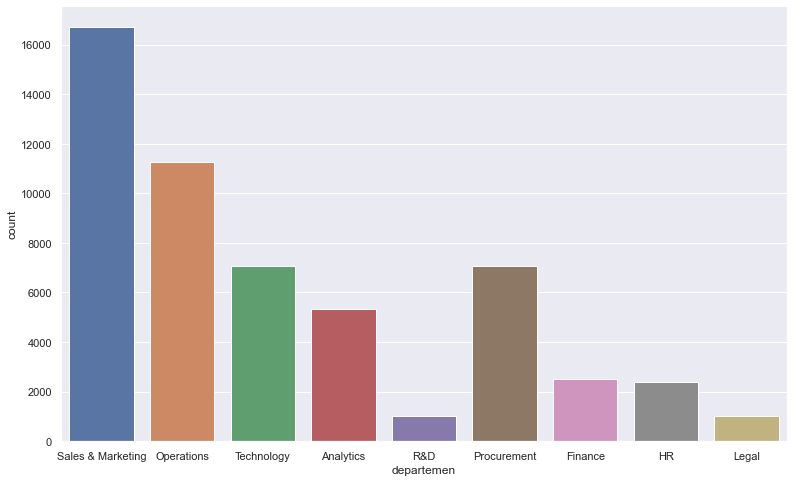

In [22]:
sns.set_theme(style="whitegrid")
sns.set(rc = {'figure.figsize':(13,8)})
ax = sns.countplot(x='departemen',data=df)

#### It can be seen from the graph above that the Sales & marketing, Operations, and Procurement features dominate the data in this department feature.

<Figure size 1440x576 with 0 Axes>

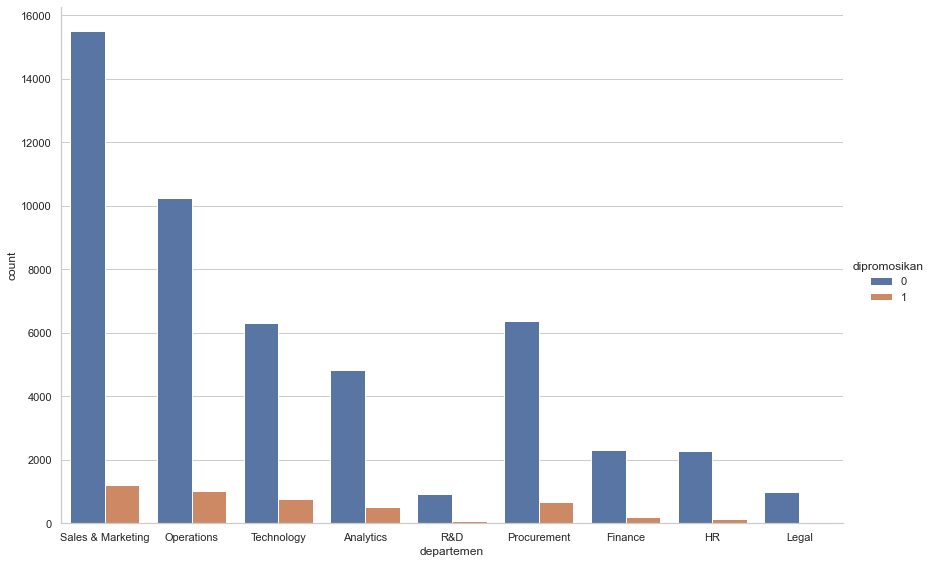

In [23]:
sns.set_theme(style="whitegrid")
plt.figure(figsize = (20,8))
sns.catplot(x='departemen',hue='dipromosikan',data=df,kind="count",height=8, aspect=1.5)

#### From the graph above, it can be seen that employees from the Sales & marketing, operations, and Technology departments were promoted the most

### 4.1.2. Pendidikan or Education Feature

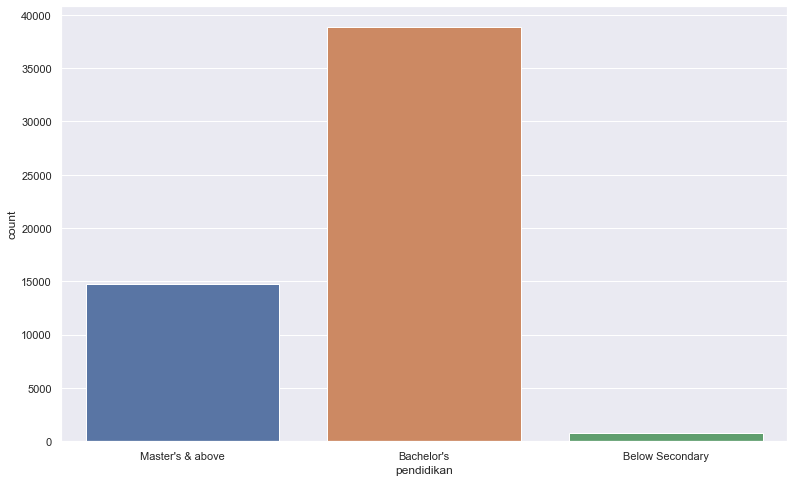

In [24]:
sns.set_theme(style="whitegrid")
sns.set(rc = {'figure.figsize':(13,8)})
ax = sns.countplot(x='pendidikan',data=df)

#### It can be seen that employees with a bachelor's background mostly dominate the data in the education column.

<Figure size 1440x576 with 0 Axes>

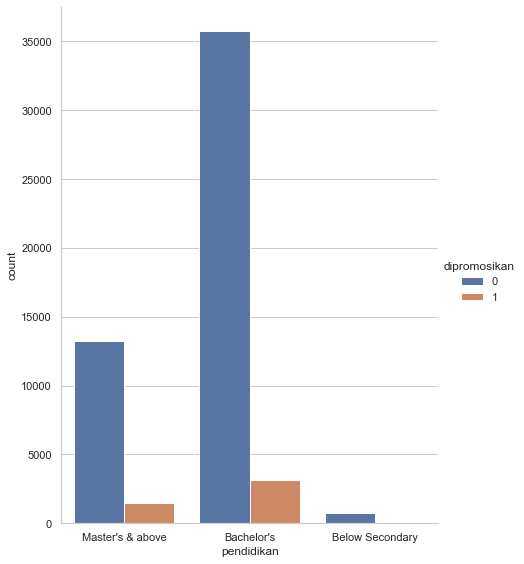

In [25]:
sns.set_theme(style="whitegrid")
plt.figure(figsize = (20,8))
sns.catplot(x='pendidikan',hue='dipromosikan',data=df,kind="count",height=8, aspect=0.8)

#### It is also seen that employees with bachelor's and master's educational backgrounds are the most promoted

### 4.1.3. Jenis Kelamin or Gender Feature

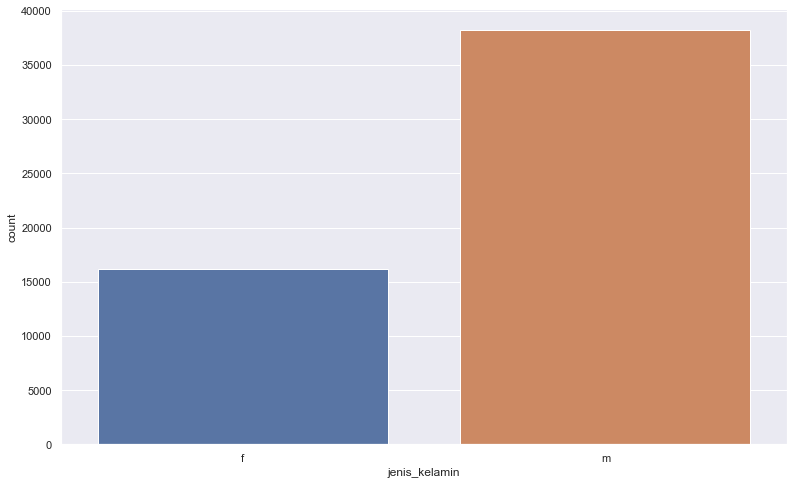

In [26]:
sns.set_theme(style="whitegrid")
sns.set(rc = {'figure.figsize':(13,8)})
ax = sns.countplot(x='jenis_kelamin',data=df)

#### It can be seen that the data is dominated by male employees

<Figure size 1440x576 with 0 Axes>

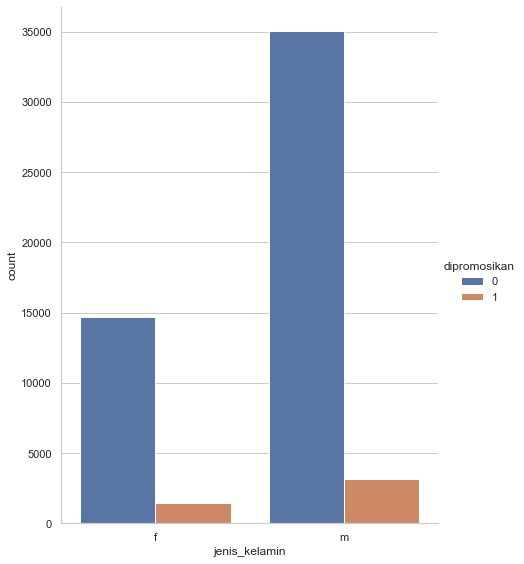

In [27]:
sns.set_theme(style="whitegrid")
plt.figure(figsize = (20,8))
sns.catplot(x='jenis_kelamin',hue='dipromosikan',data=df,kind="count",height=8, aspect=0.8)

#### It can be seen from the graph above that male employees are also promoted more (in number)

### 4.1.4. Rekrutmen or Recruitment Feature

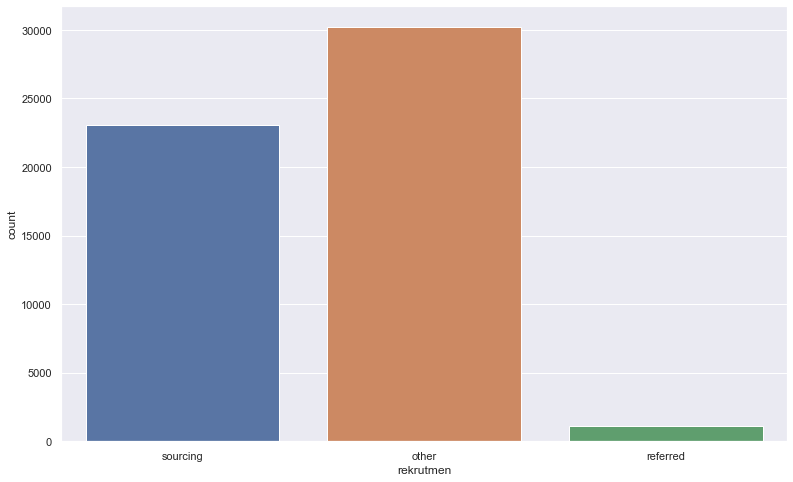

In [28]:
sns.set_theme(style="whitegrid")
sns.set(rc = {'figure.figsize':(13,8)})
ax = sns.countplot(x='rekrutmen',data=df)

#### It can be seen from the graph above that most of the employee recruitment paths are "other" or not clearly described. The second position is mostly occupied by "sourcing"

<Figure size 1440x576 with 0 Axes>

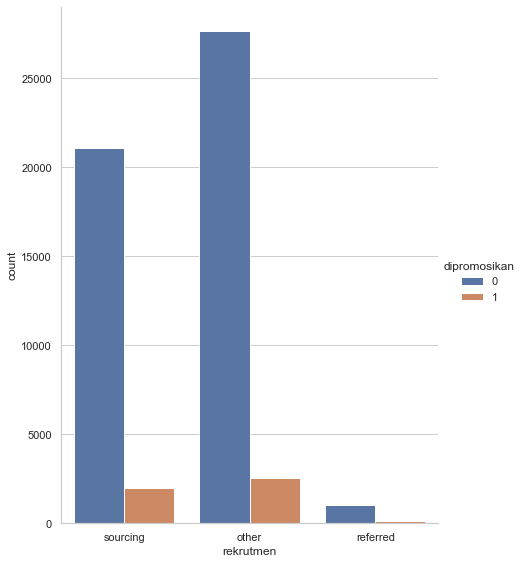

In [29]:
sns.set_theme(style="whitegrid")
plt.figure(figsize = (20,8))
sns.catplot(x='rekrutmen',hue='dipromosikan',data=df,kind="count",height=8, aspect=0.8)

#### It can be seen from the graph above that employees with "other" recruitment processes or not clearly described occupy the most positions in the order of promotion. While employees with "referred" recruitment paths are almost non-existent (slightly) are promoted)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54368 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id_karyawan              54368 non-null  int64  
 1   departemen               54368 non-null  object 
 2   wilayah                  54368 non-null  object 
 3   pendidikan               54368 non-null  object 
 4   jenis_kelamin            54368 non-null  object 
 5   rekrutmen                54368 non-null  object 
 6   jumlah_training          54368 non-null  int64  
 7   umur                     54368 non-null  int64  
 8   rating_tahun_lalu        54368 non-null  float64
 9   masa_kerja               54368 non-null  int64  
 10  KPI_>80%                 54368 non-null  int64  
 11  penghargaan              54368 non-null  int64  
 12  rata_rata_skor_training  54368 non-null  int64  
 13  dipromosikan             54368 non-null  int64  
dtypes: float64(1), int64(8

### 4.1.5. Jumlah Training or Number of Training Feature

<Figure size 1440x576 with 0 Axes>

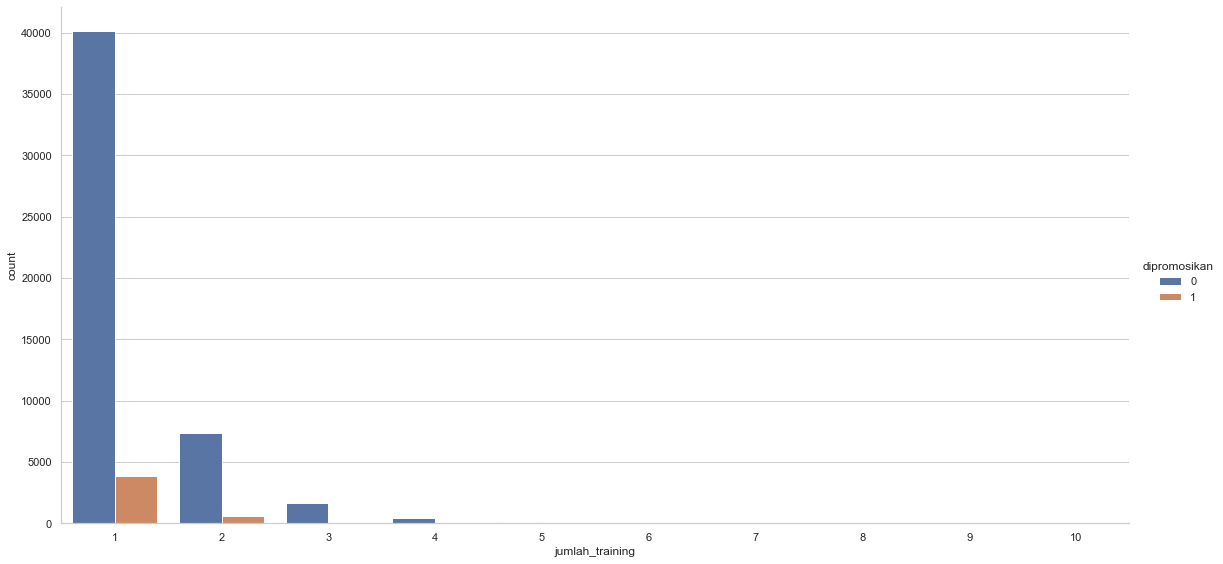

In [31]:
sns.set_theme(style="whitegrid")
plt.figure(figsize = (20,8))
sns.catplot(x='jumlah_training',hue='dipromosikan',data=df,kind="count",height=8, aspect=2)

#### It can be seen from the graph above that the employees with the least amount of training (i.e. 1) are actually promoted the most

### 4.1.6. Umur or Age Feature

<Figure size 1440x576 with 0 Axes>

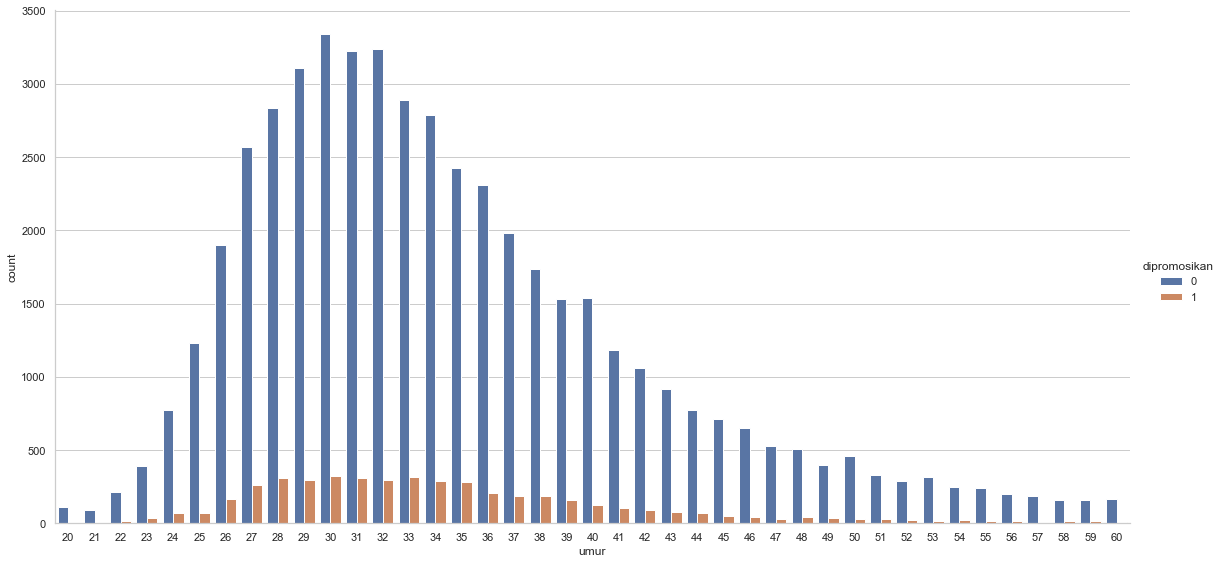

In [32]:
sns.set_theme(style="whitegrid")
plt.figure(figsize = (20,8))
sns.catplot(x='umur',hue='dipromosikan',data=df,kind="count",height=8, aspect=2)

#### It can be seen from the graph above, employees ranging in age from 27-35 years are the most promoted employees

### 4.1.7. Rating Tahun Lalu or Last Year's Rating Feature

<Figure size 1440x576 with 0 Axes>

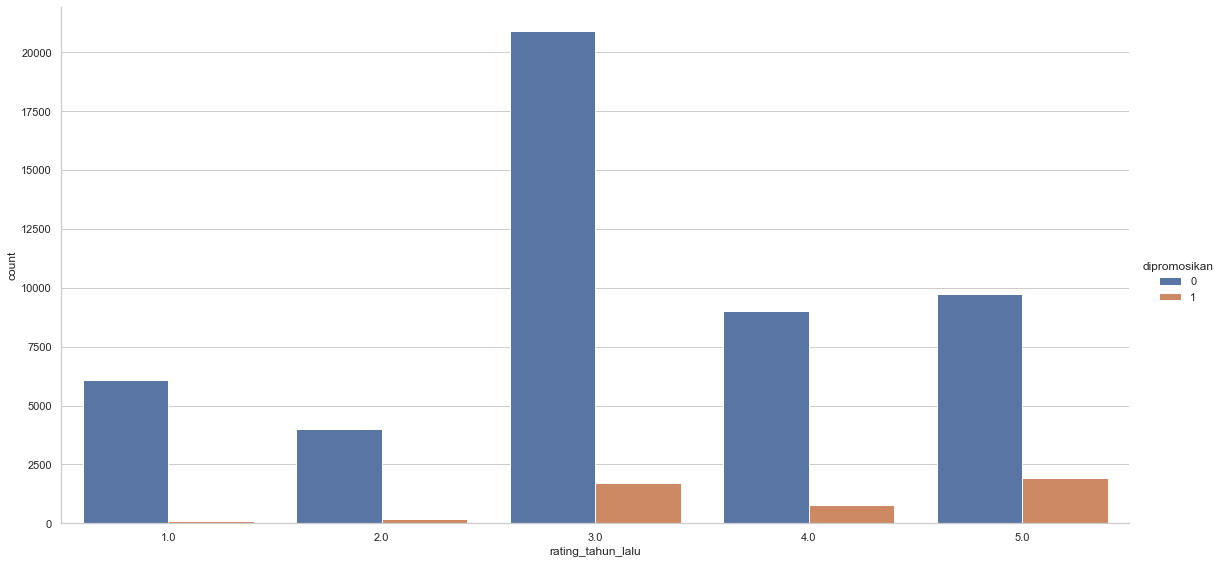

In [33]:
sns.set_theme(style="whitegrid")
plt.figure(figsize = (20,8))
sns.catplot(x='rating_tahun_lalu',hue='dipromosikan',data=df,kind="count",height=8, aspect=2)

#### It can be seen from the graph above that employees with a rating of 5 are the most promoted employees

### 4.1.8. Masa Kerja or Working Period Feature

<Figure size 1440x576 with 0 Axes>

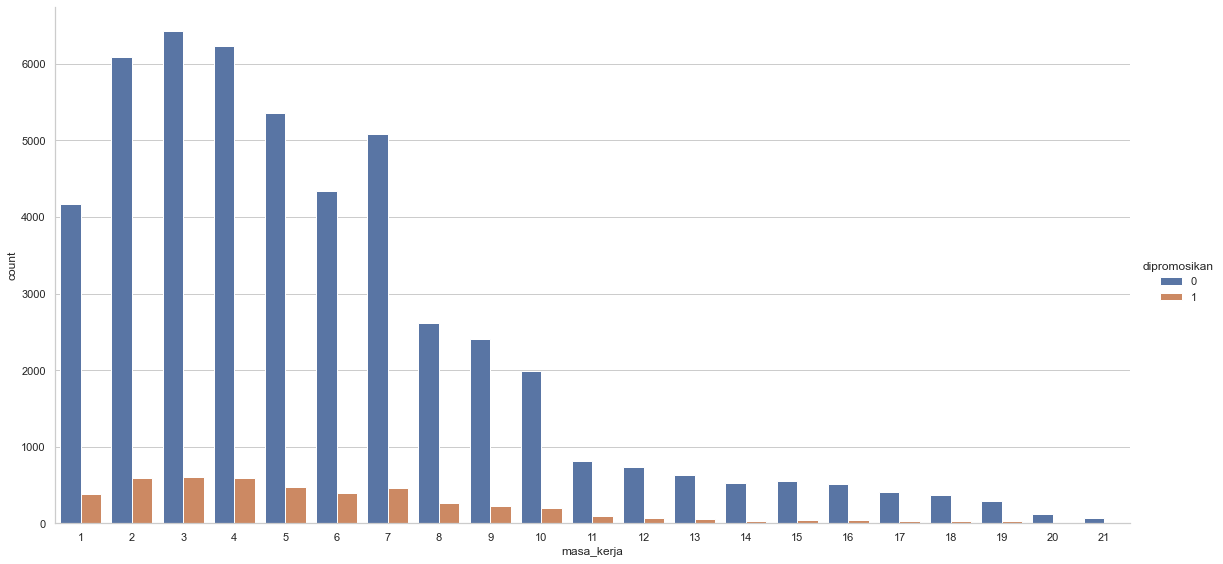

In [34]:
sns.set_theme(style="whitegrid")
plt.figure(figsize = (20,8))
sns.catplot(x='masa_kerja',hue='dipromosikan',data=df,kind="count",height=8, aspect=2)

#### It can be seen from the graph above that employees with 2-4 years of service are the most promoted employees.

### 4.1.9. Key Performance Index (KPI) Feature

<Figure size 1440x576 with 0 Axes>

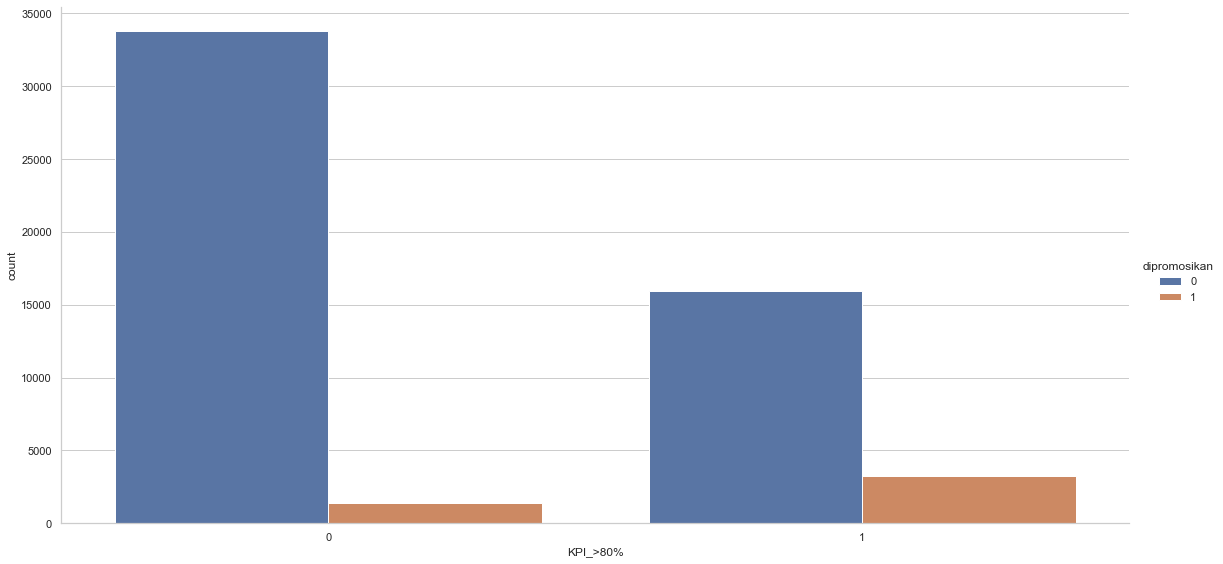

In [35]:
sns.set_theme(style="whitegrid")
plt.figure(figsize = (20,8))
sns.catplot(x='KPI_>80%',hue='dipromosikan',data=df,kind="count",height=8, aspect=2)

#### It can be seen from the graph, although most employees have KPIs below 80%, the employees who are promoted the most are employees who have KPIs above 80%.

### 4.1.10. Penghargaan or Awards Feature

<Figure size 1440x576 with 0 Axes>

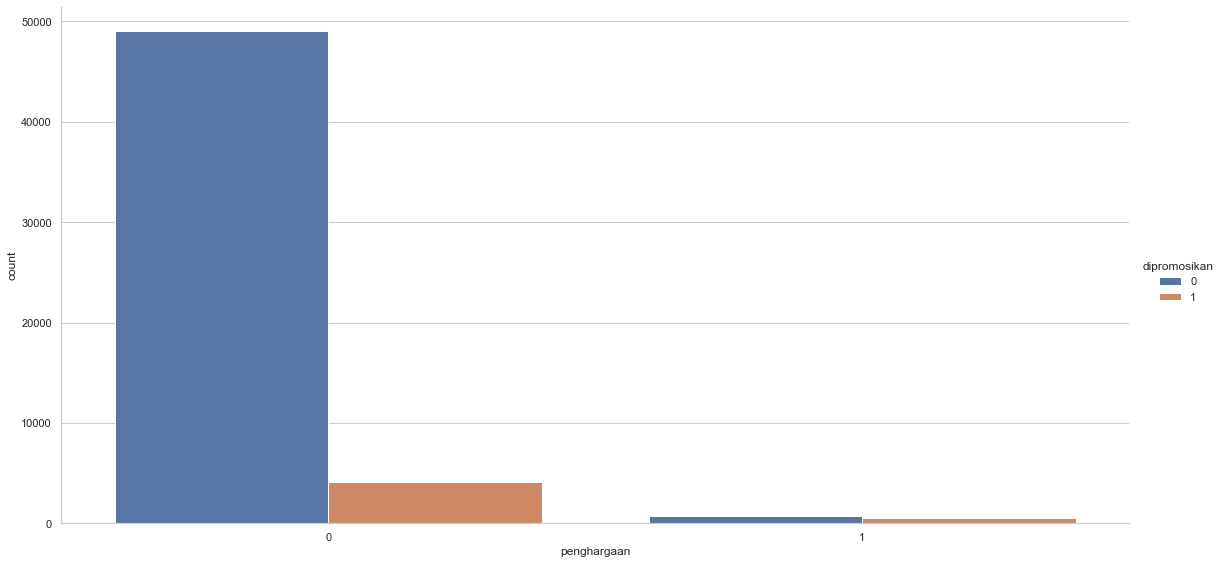

In [36]:
sns.set_theme(style="whitegrid")
plt.figure(figsize = (20,8))
sns.catplot(x='penghargaan',hue='dipromosikan',data=df,kind="count",height=8, aspect=2)

#### It can be seen from the graph that employees who do not have awards are the most promoted. This is also because the number of employees who do not have awards is much higher than employees who have awards.

### 4.1.11. Rata-rata Skor Training or Average Training Score Feature

<Figure size 1440x576 with 0 Axes>

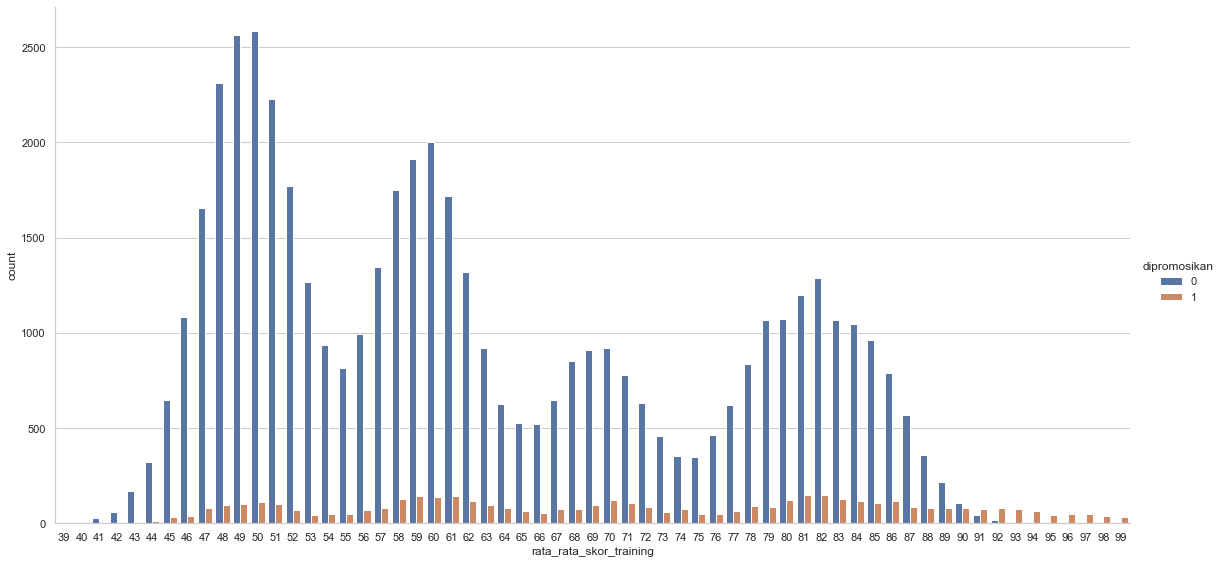

In [37]:
sns.set_theme(style="whitegrid")
plt.figure(figsize = (20,8))
sns.catplot(x='rata_rata_skor_training',hue='dipromosikan',data=df,kind="count",height=8, aspect=2)

#### It can be seen that employees have an average training score that varies. The number of employees who are promoted based on the average training score also varies, it cannot be determined which score dominates. However, approximately employees with average training scores in the range 59-62 and 80-85 were the most promoted (although the difference may be small).

### 4.1.12. "dipromosikan"or "promoted" Feature as Target Feature

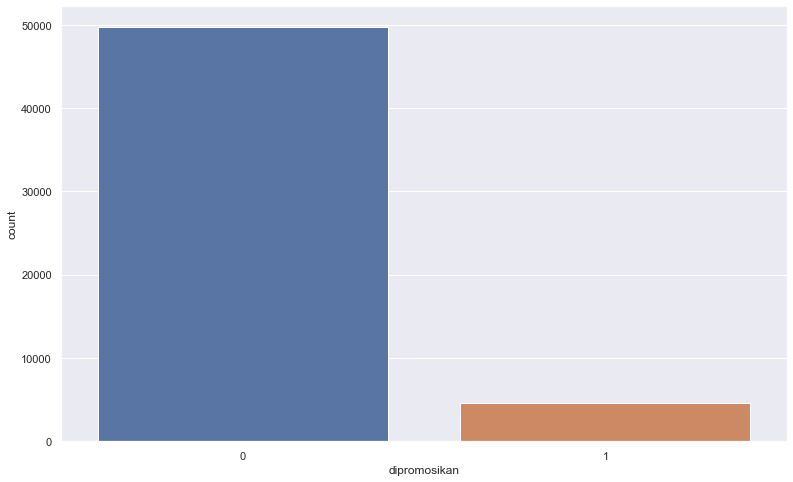

In [38]:
sns.set_theme(style="whitegrid")
sns.set(rc = {'figure.figsize':(13,8)})
ax = sns.countplot(x='dipromosikan',data=df)

#### It can be seen that our target feature data between positive and negative is not balanced. We have more negative data.

## 4.2. Correlation Between Features

#### At first i thought there was a significant relationship or correlation between the features of the number of employee training, last year's rating, and employee key performance index. We will check the correlation using Pearson correlation and map it on a heat map.

                   jumlah_training  rating_tahun_lalu  KPI_>80%
jumlah_training           1.000000          -0.061718 -0.045785
rating_tahun_lalu        -0.061718           1.000000  0.336349
KPI_>80%                 -0.045785           0.336349  1.000000


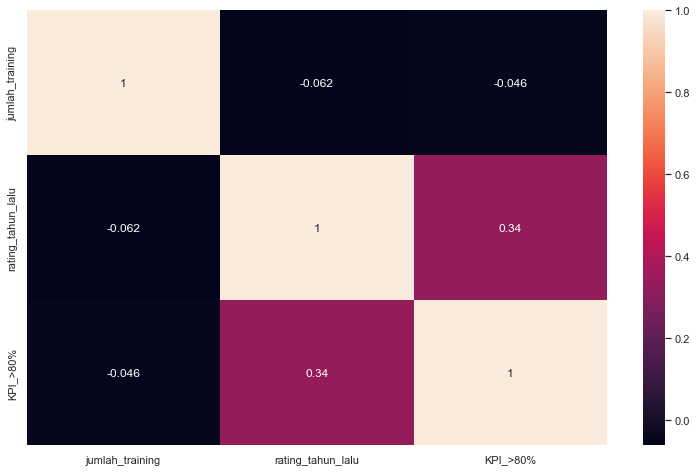

In [39]:
print(df[['jumlah_training','rating_tahun_lalu','KPI_>80%']].corr())
sns.heatmap(df[['jumlah_training','rating_tahun_lalu','KPI_>80%']].corr(), annot=True);

#### However, it turns out that there is no significant correlation between these features, so there is no need to check the P-Value again

#### Now we will check the overall correlation of the features in the data

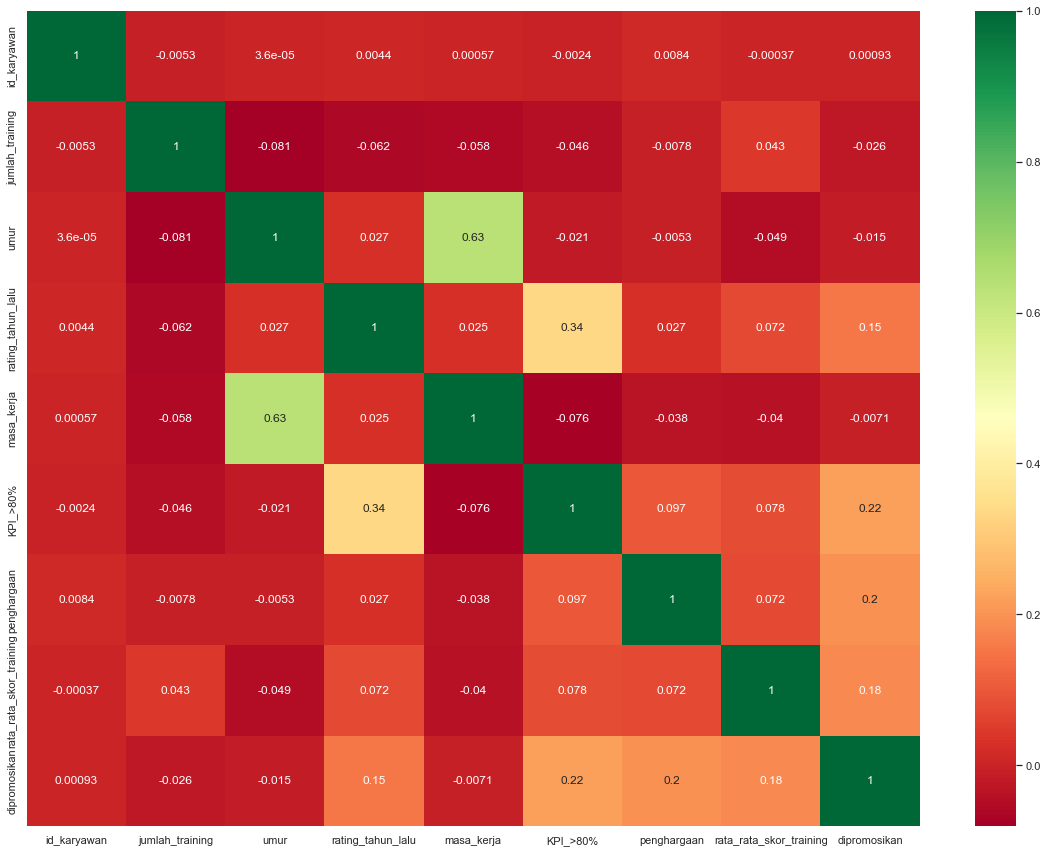

In [40]:
plt.figure(figsize=(20,15))

#plot heat map
g=sns.heatmap(df.corr(),annot=True,cmap="RdYlGn")

#### It seems that there is no significant and significant correlation of each feature. You can also check the pairplot of each feature in the data.

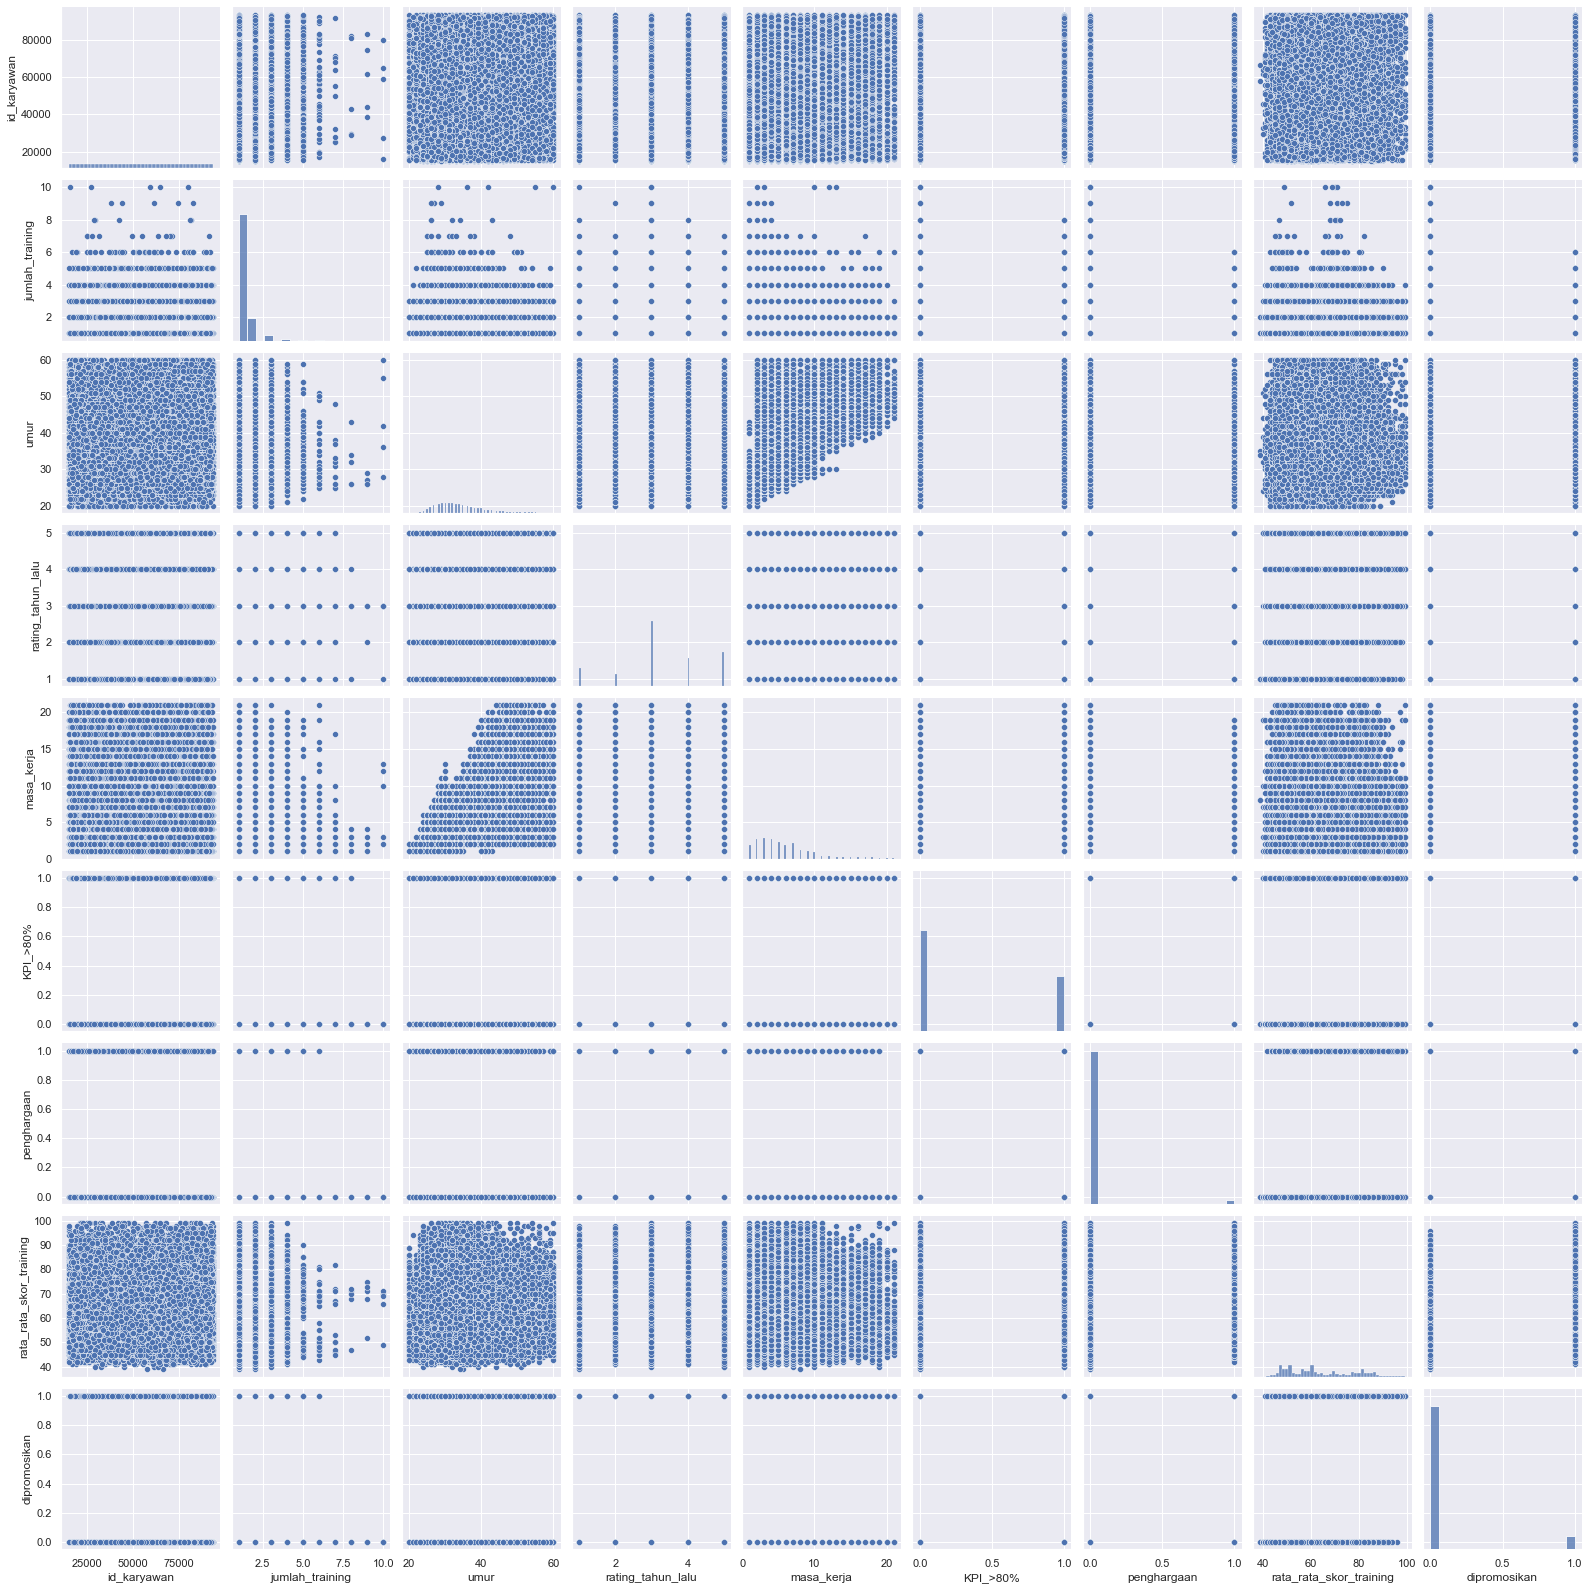

In [41]:
sns.pairplot(df)

## 4.3. Analysis dan Statistics Visualization on Features of Our Dataset

### 4.3.1. Analysis on Average Key Performance Index Against Employee Department

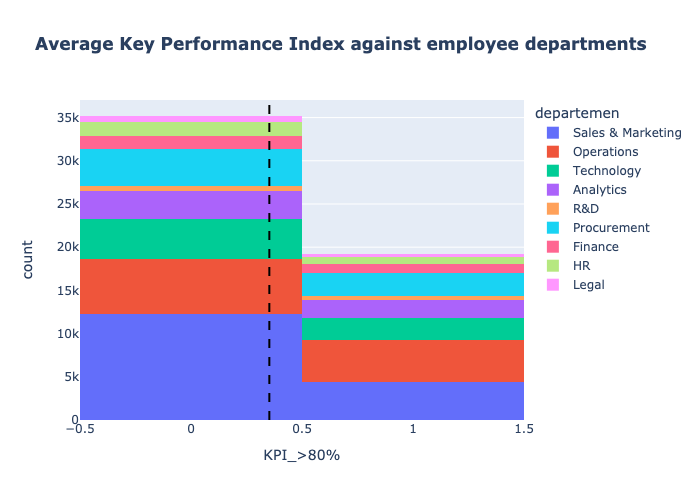

In [42]:
fig = px.histogram(df, 'KPI_>80%',             
                   color='departemen',
                   title="<b>Average Key Performance Index against employee departments</b>")

fig.add_vline(x=df['KPI_>80%'].mean(), line_width=2, line_dash="dash", line_color="black")

fig.show(renderer='png')



#### The sales & marketing department is the department with the most employees having a KPI of more than 80 percent. It is also seen that more employees from each department have KPIs less than 80%

### 4.3.2. Analysis on Average Key Performance Index Against Employee Educational Background

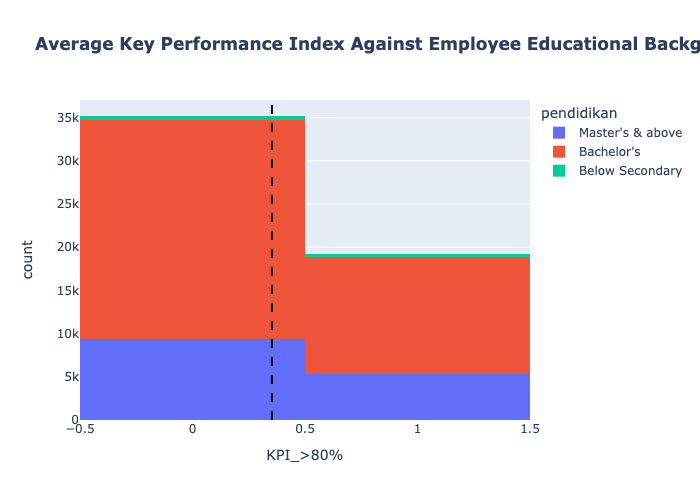

In [43]:
fig = px.histogram(df, 'KPI_>80%',             
                   color='pendidikan',
                   title="<b>Average Key Performance Index Against Employee Educational Background </b>")

fig.add_vline(x=df['KPI_>80%'].mean(), line_width=2, line_dash="dash", line_color="black")

fig.show(renderer='png')



#### Employees with a bachelor's educational background at most have a KPI of more than 80 percent. The average of the distributions can be seen in the graph above

### 4.3.3. Analysis on Average Employee Working Period Against Employee Department

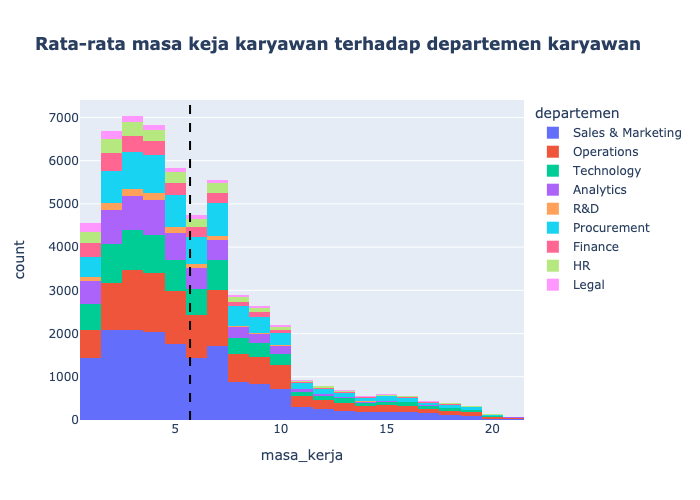

In [44]:
fig = px.histogram(df, 'masa_kerja',             
                   color='departemen',
                   title="<b>Rata-rata masa keja karyawan terhadap departemen karyawan</b>")

fig.add_vline(x=df['masa_kerja'].mean(), line_width=2, line_dash="dash", line_color="black")

fig.show(renderer='png')


#### From the graph, it can be seen that employees from the sales & marketing departments as well as operations, as well as technology are in the order of employees who have worked between 1-10 years the most in the company. Employees who have a working period of more than 10 years are mostly employees from the operations, technology and finance departments.

### 4.3.4. Analysis on Training Score Against Department of Each Employee

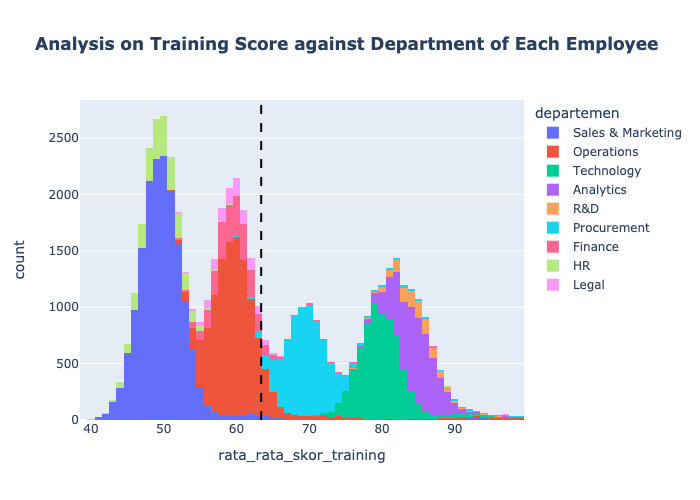

In [45]:
fig = px.histogram(df, 'rata_rata_skor_training',             
                   color='departemen',
                   title="<b>Analysis on Training Score against Department of Each Employee</b>")

fig.add_vline(x=df['rata_rata_skor_training'].mean(), line_width=2, line_dash="dash", line_color="black")

fig.show(renderer='png')


#### It can be seen from the graph that the average score for employee training is 64 with employees from the operations and legal departments having the most average scores. Meanwhile, the highest average training score (85-100) is mostly owned by employees from the Analytics and R&D departments.

### 4.3.5. Analysis on Training Score Against Employee Educational Background

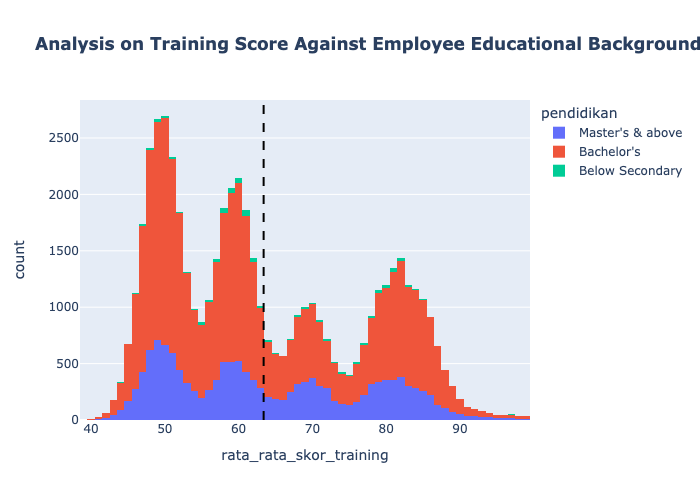

In [46]:
fig = px.histogram(df, 'rata_rata_skor_training',             
                   color='pendidikan',
                   title="<b>Analysis on Training Score Against Employee Educational Background</b>")

fig.add_vline(x=df['rata_rata_skor_training'].mean(), line_width=2, line_dash="dash", line_color="black")

fig.show(renderer='png')


#### Then lastly, employees who have the highest average training scores are employees with a bachelor's educational background

### 4.3.6. Numerical and Continuous Feature Distribution on Our Data

#### The following boxplot is shown to display the distribution of the data

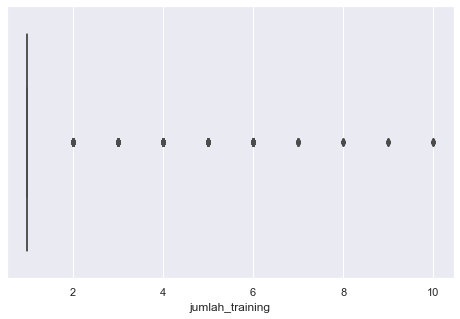

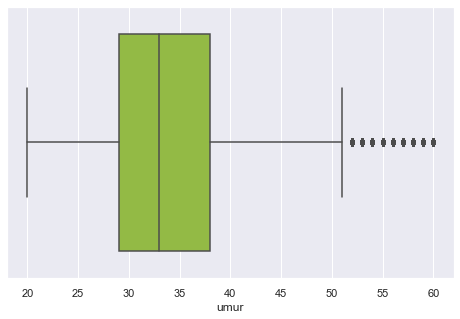

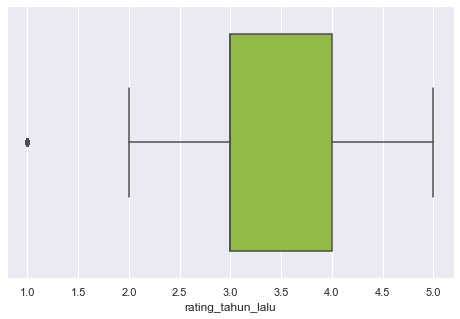

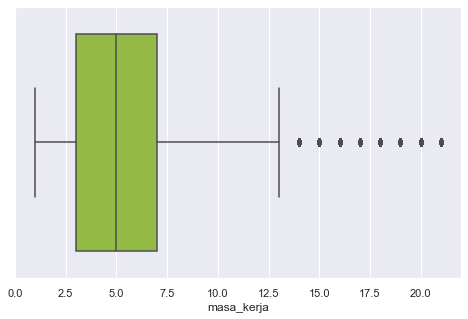

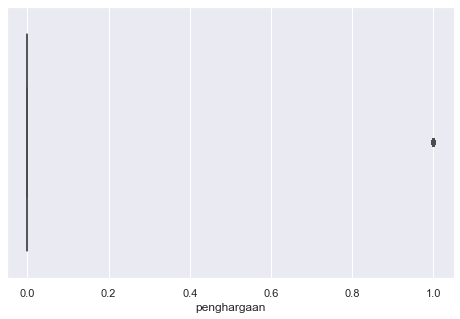

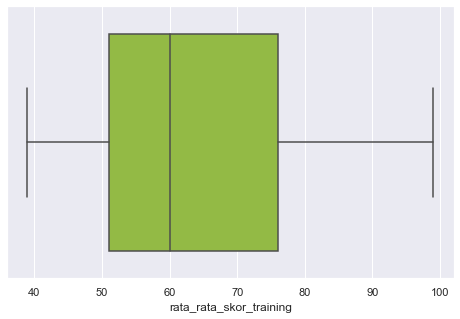

In [47]:
x = df.drop(['id_karyawan','departemen','wilayah','pendidikan','jenis_kelamin','rekrutmen','dipromosikan','KPI_>80%'],axis = 1)
for i in x.columns:
    sns.set(rc = {'figure.figsize':(8,5)})
    sns.boxplot(x = i, data = x,color = 'yellowgreen')   
    plt.xlabel(i)
    plt.show()
    

# 5. Machine Learning Modelling

## 5.1. Data Preprocessing

### 5.1.2. Filtering Data

#### Kolom id_karyawan dan wilayah karyawan bekerja dibuang karena dirasa tidak relevan terhadap promosi karyawan.

In [48]:
df = df.drop(["id_karyawan","wilayah"],axis=1)
df.head()

departemen        pendidikan jenis_kelamin rekrutmen  \
0  Sales & Marketing  Master's & above             f  sourcing   
1         Operations        Bachelor's             m     other   
2  Sales & Marketing        Bachelor's             m  sourcing   
3  Sales & Marketing        Bachelor's             m     other   
4         Technology        Bachelor's             m     other   

   jumlah_training  umur  rating_tahun_lalu  masa_kerja  KPI_>80%  \
0                1    35                5.0           8         1   
1                1    30                5.0           4         0   
2                1    34                3.0           7         0   
3                2    39                1.0          10         0   
4                1    45                3.0           2         0   

   penghargaan  rata_rata_skor_training  dipromosikan  
0            0                       49             0  
1            0                       60             0  
2            0                       50             0  
3            0                       50             0  
4            0                       73             0

### 5.1.3. Categorical Features Encoding

#### There are several encoding techniques, including one-hot encoding and label encoding. Here I use one-hot encoding.

In [49]:
def one_hot_encoder(data,feature,keep_first=True):

    one_hot_cols = pd.get_dummies(data[feature])
    
    for col in one_hot_cols.columns:
        one_hot_cols.rename({col:f'{feature}_'+col},axis=1,inplace=True)
    
    new_data = pd.concat([data,one_hot_cols],axis=1)
    new_data.drop(feature,axis=1,inplace=True)
    
    if keep_first == False:
        new_data=new_data.iloc[:,1:]
    
    return new_data

In [50]:
df_onehot=df.copy()
for col in df_onehot.select_dtypes(include='O').columns:
    df_onehot=one_hot_encoder(df_onehot,col)

In [51]:
df_onehot.head()

jumlah_training  umur  rating_tahun_lalu  masa_kerja  KPI_>80%  \
0                1    35                5.0           8         1   
1                1    30                5.0           4         0   
2                1    34                3.0           7         0   
3                2    39                1.0          10         0   
4                1    45                3.0           2         0   

   penghargaan  rata_rata_skor_training  dipromosikan  departemen_Analytics  \
0            0                       49             0                     0   
1            0                       60             0                     0   
2            0                       50             0                     0   
3            0                       50             0                     0   
4            0                       73             0                     0   

   departemen_Finance  ...  departemen_Sales & Marketing  \
0                   0  ...                             1   
1                   0  ...                             0   
2                   0  ...                             1   
3                   0  ...                             1   
4                   0  ...                             0   

   departemen_Technology  pendidikan_Bachelor's  pendidikan_Below Secondary  \
0                      0                      0                           0   
1                      0                      1                           0   
2                      0                      1                           0   
3                      0                      1                           0   
4                      1                      1                           0   

   pendidikan_Master's & above  jenis_kelamin_f  jenis_kelamin_m  \
0                            1                1                0   
1                            0                0                1   
2                            0                0                1   
3                            0                0                1   
4                            0                0                1   

   rekrutmen_other  rekrutmen_referred  rekrutmen_sourcing  
0                0                   0                   1  
1                1                   0                   0  
2                0                   0                   1  
3                1                   0                   0  
4                1                   0                   0  

[5 rows x 25 columns]

In [52]:
df_onehot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54368 entries, 0 to 54807
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   jumlah_training               54368 non-null  int64  
 1   umur                          54368 non-null  int64  
 2   rating_tahun_lalu             54368 non-null  float64
 3   masa_kerja                    54368 non-null  int64  
 4   KPI_>80%                      54368 non-null  int64  
 5   penghargaan                   54368 non-null  int64  
 6   rata_rata_skor_training       54368 non-null  int64  
 7   dipromosikan                  54368 non-null  int64  
 8   departemen_Analytics          54368 non-null  uint8  
 9   departemen_Finance            54368 non-null  uint8  
 10  departemen_HR                 54368 non-null  uint8  
 11  departemen_Legal              54368 non-null  uint8  
 12  departemen_Operations         54368 non-null  uint8  
 13  d

## 5.2. Data Splitting into training and test data

In [53]:
scaler = StandardScaler()
X = df_onehot.drop("dipromosikan",axis=1)
y = df_onehot["dipromosikan"]

#### Train size and test size are divided into proportions (60:40). I have tried other proportions and finally I used this proportion.

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.4,random_state = 0)

#### Data Scaling

In [55]:
scaler.fit(X_train, y_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## 5.3. Machine Learning Model

### 5.3.1. Model K-Nearest Neighbor (KNN)

In [56]:
model_knn = KNeighborsClassifier()
model_knn.fit(X_train,y_train)

KNeighborsClassifier()

In [57]:
pred_knn = model_knn.predict(X_test)
print(classification_report(y_test,pred_knn))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96     19853
           1       0.61      0.18      0.28      1895

    accuracy                           0.92     21748
   macro avg       0.77      0.59      0.62     21748
weighted avg       0.90      0.92      0.90     21748



In [58]:
cmat = confusion_matrix(y_test,pred_knn)
print('TN - True Negative {}'.format(cmat[0,0]))
print('FP - False Positive {}'.format(cmat[0,1]))
print('FN - False Negative {}'.format(cmat[1,0]))
print('TP - True Positive {}'.format(cmat[1,1]))
print('Accuracy Rate: {}'.format(np.divide(np.sum([cmat[0,0],cmat[1,1]]),np.sum(cmat))))
print('Misclassification Rate: {}'.format(np.divide(np.sum([cmat[0,1],cmat[1,0]]),np.sum(cmat))))

TN - True Negative 19637
FP - False Positive 216
FN - False Negative 1552
TP - True Positive 343
Accuracy Rate: 0.9187051682913371
Misclassification Rate: 0.08129483170866286


### 5.3.2. Model Naive Bayes

In [59]:
model_gaussian = GaussianNB()
model_gaussian.fit(X_train,y_train)

GaussianNB()

In [60]:
pred_gauss = model_gaussian.predict(X_test)
print(classification_report(y_test,pred_gauss))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94     19853
           1       0.31      0.20      0.25      1895

    accuracy                           0.89     21748
   macro avg       0.62      0.58      0.59     21748
weighted avg       0.87      0.89      0.88     21748



In [61]:
cmat = confusion_matrix(y_test,pred_gauss)
print('TN - True Negative {}'.format(cmat[0,0]))
print('FP - False Positive {}'.format(cmat[0,1]))
print('FN - False Negative {}'.format(cmat[1,0]))
print('TP - True Positive {}'.format(cmat[1,1]))
print('Accuracy Rate: {}'.format(np.divide(np.sum([cmat[0,0],cmat[1,1]]),np.sum(cmat))))
print('Misclassification Rate: {}'.format(np.divide(np.sum([cmat[0,1],cmat[1,0]]),np.sum(cmat))))

TN - True Negative 18994
FP - False Positive 859
FN - False Negative 1508
TP - True Positive 387
Accuracy Rate: 0.8911624057384587
Misclassification Rate: 0.10883759426154128


### 5.3.3. Model Logistic Regression

In [62]:
model_LR = LogisticRegression()
model_LR.fit(X_train,y_train)

LogisticRegression()

In [63]:
pred_LR = model_LR.predict(X_test)
print(classification_report(y_test,pred_LR))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96     19853
           1       0.84      0.25      0.39      1895

    accuracy                           0.93     21748
   macro avg       0.89      0.62      0.68     21748
weighted avg       0.93      0.93      0.91     21748



In [64]:
cmat = confusion_matrix(y_test,pred_LR)
print('TN - True Negative {}'.format(cmat[0,0]))
print('FP - False Positive {}'.format(cmat[0,1]))
print('FN - False Negative {}'.format(cmat[1,0]))
print('TP - True Positive {}'.format(cmat[1,1]))
print('Accuracy Rate: {}'.format(np.divide(np.sum([cmat[0,0],cmat[1,1]]),np.sum(cmat))))
print('Misclassification Rate: {}'.format(np.divide(np.sum([cmat[0,1],cmat[1,0]]),np.sum(cmat))))

TN - True Negative 19761
FP - False Positive 92
FN - False Negative 1413
TP - True Positive 482
Accuracy Rate: 0.9307982343203973
Misclassification Rate: 0.06920176567960272


### 5.3.4. Model Random Forest

In [65]:
model_forest = RandomForestClassifier()
model_forest.fit(X_train,y_train)

RandomForestClassifier()

In [66]:
pred_forest = model_forest.predict(X_test)
print(classification_report(y_test,pred_forest))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96     19853
           1       0.71      0.32      0.44      1895

    accuracy                           0.93     21748
   macro avg       0.82      0.65      0.70     21748
weighted avg       0.92      0.93      0.92     21748



In [67]:
cmat = confusion_matrix(y_test,pred_forest)
print('TN - True Negative {}'.format(cmat[0,0]))
print('FP - False Positive {}'.format(cmat[0,1]))
print('FN - False Negative {}'.format(cmat[1,0]))
print('TP - True Positive {}'.format(cmat[1,1]))
print('Accuracy Rate: {}'.format(np.divide(np.sum([cmat[0,0],cmat[1,1]]),np.sum(cmat))))
print('Misclassification Rate: {}'.format(np.divide(np.sum([cmat[0,1],cmat[1,0]]),np.sum(cmat))))

TN - True Negative 19605
FP - False Positive 248
FN - False Negative 1284
TP - True Positive 611
Accuracy Rate: 0.9295567408497333
Misclassification Rate: 0.0704432591502667


### As noted in the target visualization section we have ("promoted") the number is not balanced between positive and negative classes. Therefore, we should not rely solely on accuracy metrics, but we also need to look at precision metrics, recall, and most importantly, F1-Score which combines the two.

### It seems that all the models produce quite high accuracy (almost all above 90%), but we need to select the model based on its F1-Score as well. From several models, it was obtained that the highest F1-Score was generated by the Random Forest model, which was around 70%. Then in this case, Random Forest is our optimal model. However we can improve this model by tuning its hyperparameters.

# 6. Suggestions for Model Deployment and Model Life Cycle

### In ML Model life cycle first step we have to do is to understand the problem and cleaning raw data. Then we can continue do some data processing and modeling. Of course the model that has been made will be deployed. However, several things need to be considered, including the context of the data that will be faced by the model. The model is made for certain data contexts and data that is neat, therefore this model should not be deployed raw, but needs to be added features to process incoming data automatically. We must continue to understand the context of the data problem before the model is used. The running of the model needs to be maintained and monitored continuously to avoid failure of the working model.

### We can use docker to do the model deployment.

### Statistical differences and distribution of the data to be tested and faced by the model must also be considered. In addition, engineering errors in implementing the system in the deployment model also need to be avoided and monitored. Then lastly, the model must be continuously updated if it is deemed necessary to make changes, both versions or functionality.

### The following is a schematic of the machine learning life cycle model that i got from Andrew's ML Operations and Project course from deeplearning.ai in Coursera:

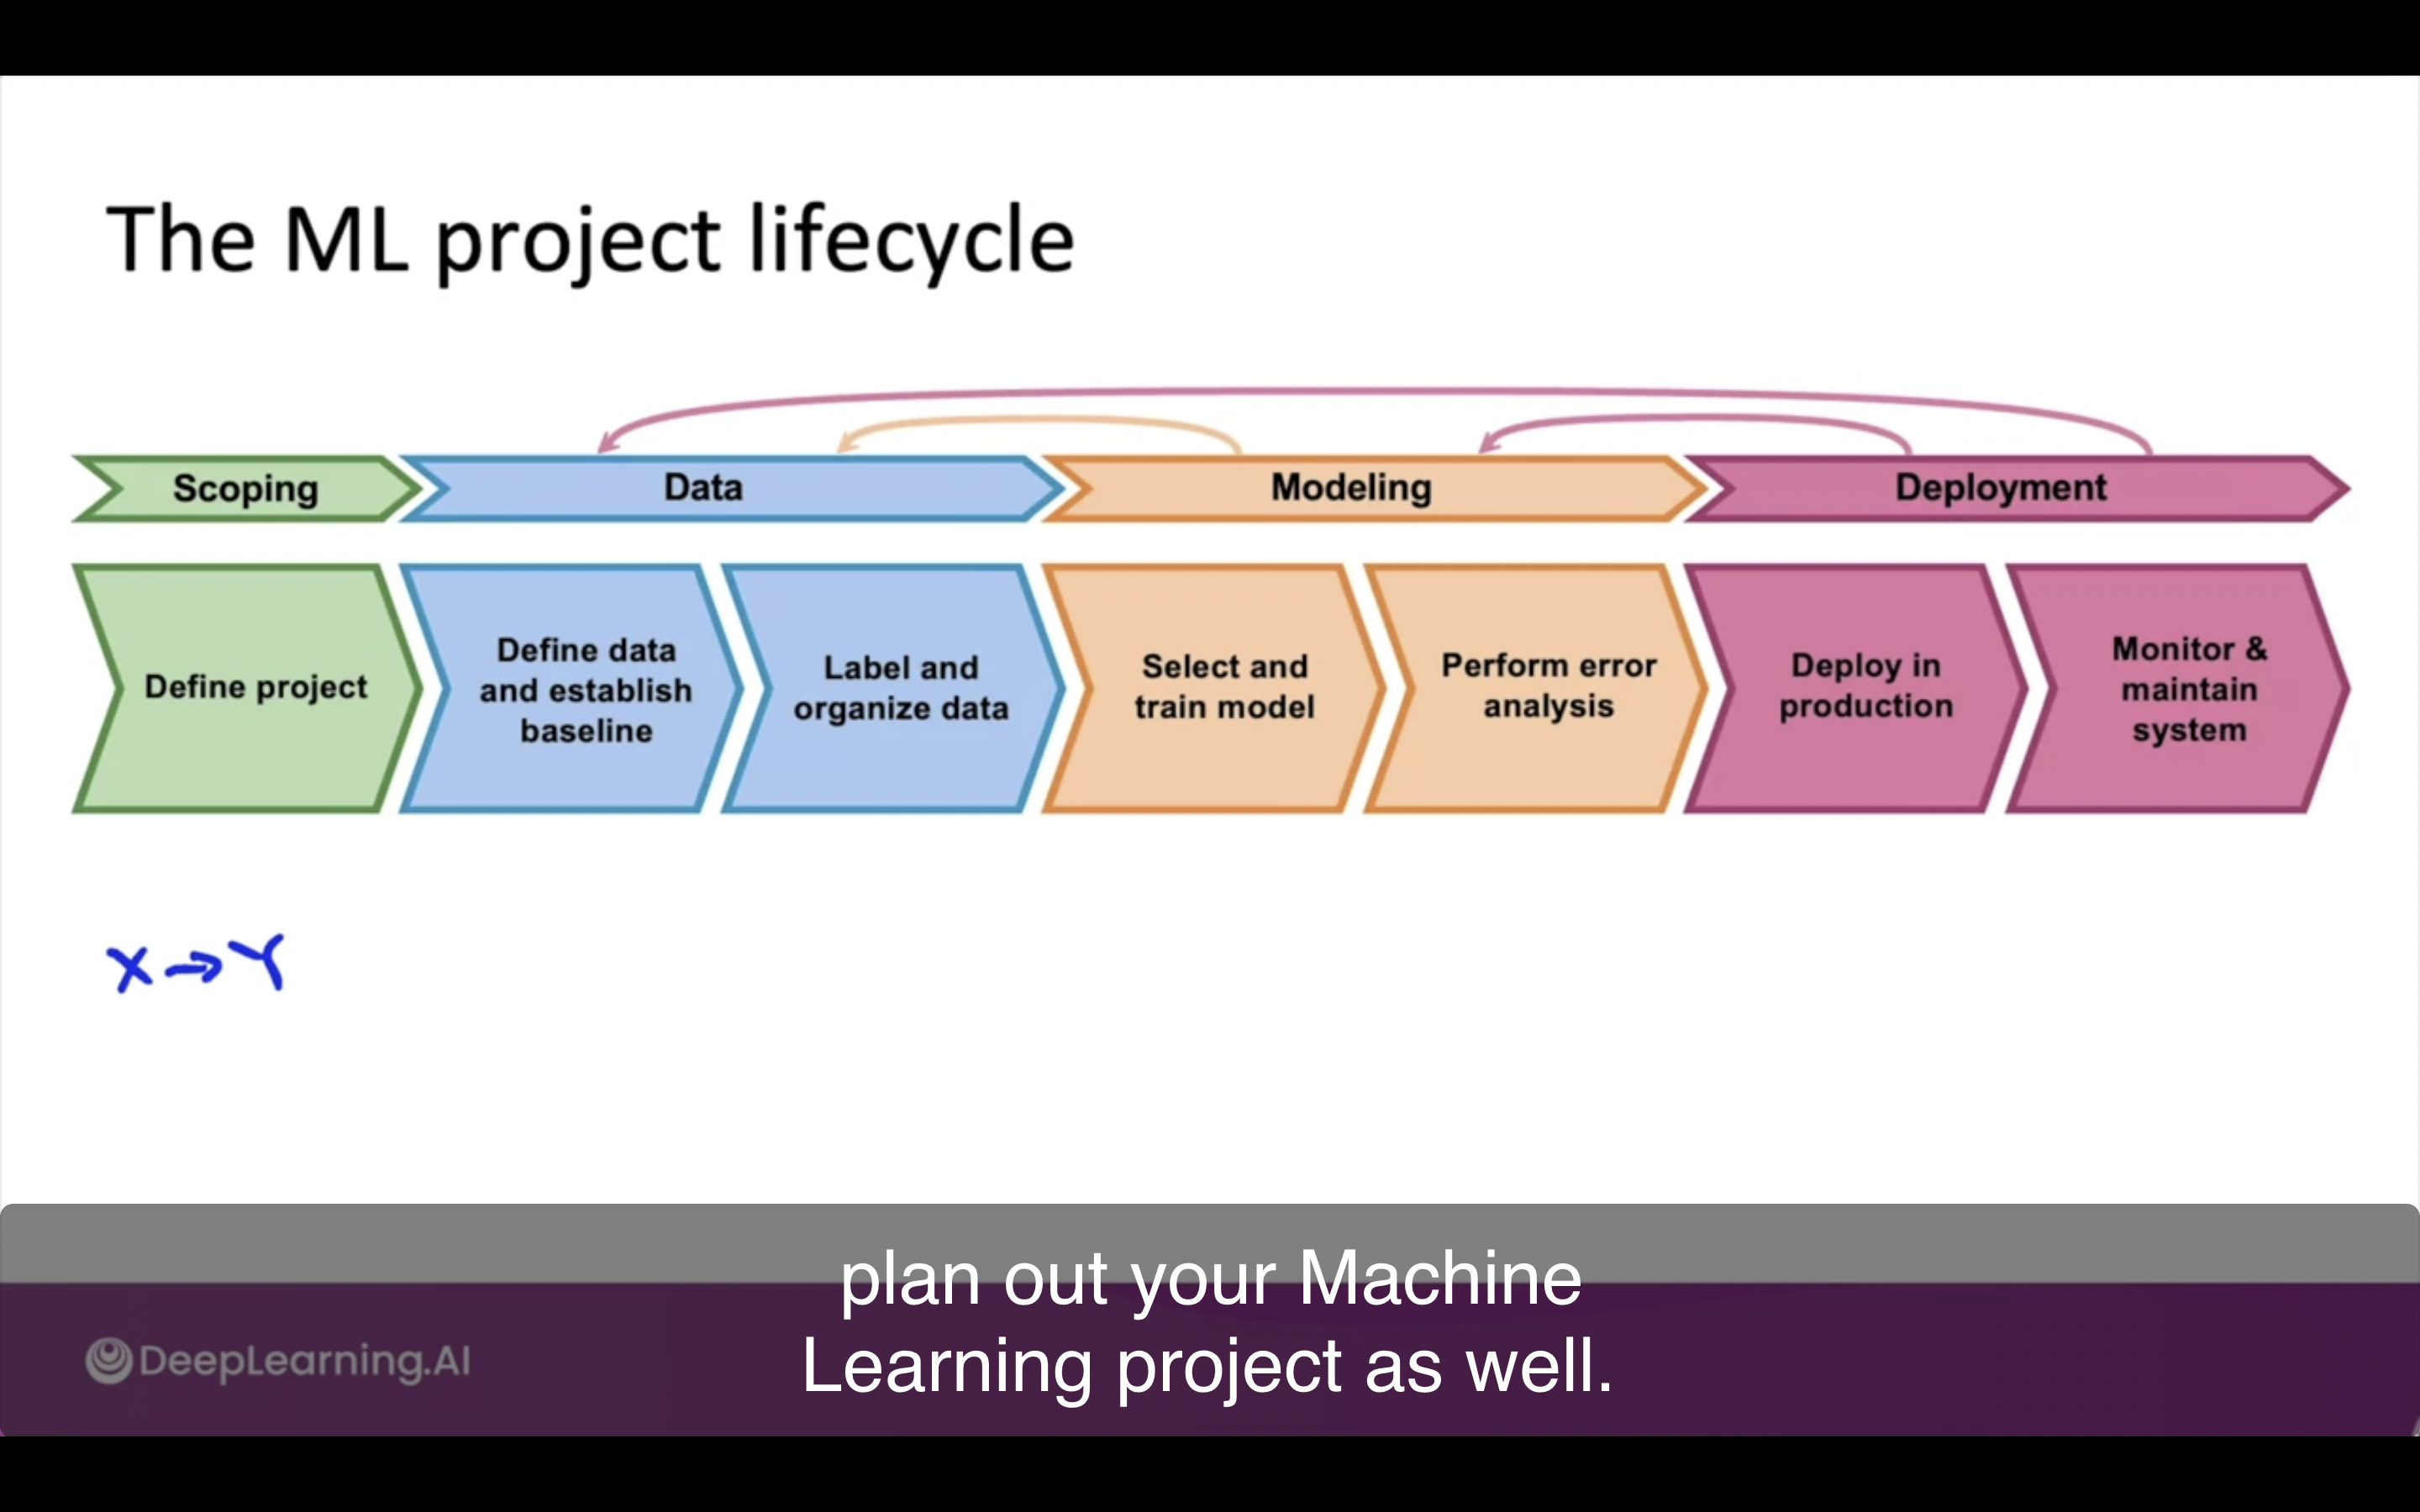